##Importing Necessary Libraries

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

##Load the dataset

In [91]:
data = pd.read_csv("/content/Real_Estate.csv")

## Display the first few rows of the dataset and the info about the dataset

In [92]:
# Display the first few rows of the dataset and the info about the dataset
data_head = data.head()
data_info = data.info()

print(data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

##Printing, if the data contains any null values or not

In [93]:
print(data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


##If we observe, The dataset contains no null values.

##Now, Printing descriptive Statistics of the dataset

In [94]:
# Descriptive statistics of the dataset
descriptive_stats = data.describe()

print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

##Printing the histograms of all the numerical features

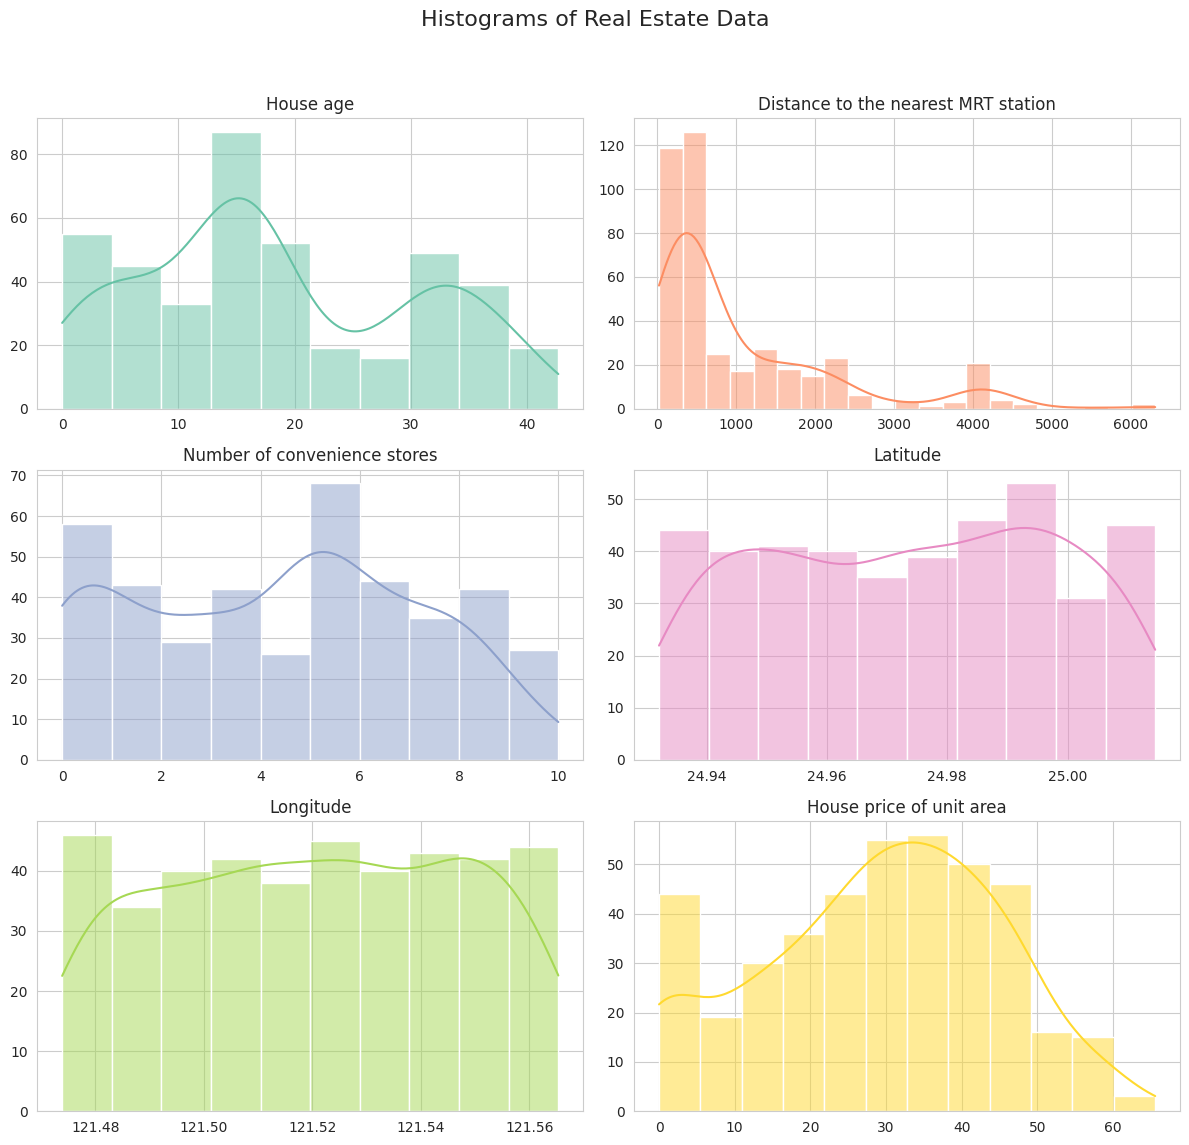

In [95]:
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

# Define the columns and a color palette
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']
colors = sns.color_palette("Set2", len(cols))

for i, col in enumerate(cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2], color=colors[i])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##To explore the relationships between different variables and house prices, we can create scatter plots. These plots will help us understand which factors might be influencing property prices more significantly

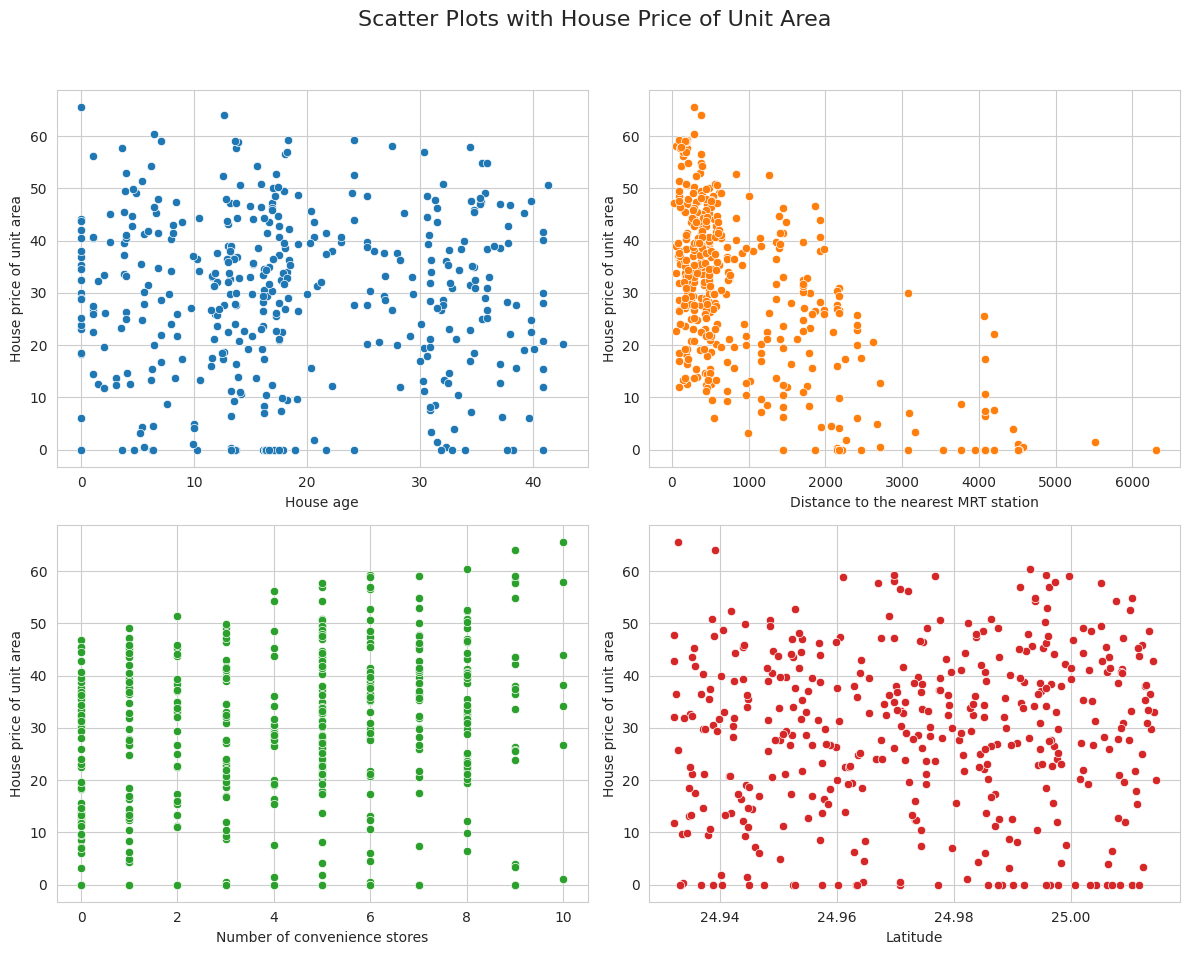

In [96]:
sns.set_style("whitegrid")

# Create scatter plots for the numerical columns against house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Define the colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Scatter plot for each variable against the house price
sns.scatterplot(data=data, x='House age', y='House price of unit area', ax=axes[0, 0], color=colors[0])
sns.scatterplot(data=data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1], color=colors[1])
sns.scatterplot(data=data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0], color=colors[2])
sns.scatterplot(data=data, x='Latitude', y='House price of unit area', ax=axes[1, 1], color=colors[3])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##It would be helpful to conduct a correlation analysis to quantify the relationships between these variables, particularly focusing on how each one correlates with house prices. This analysis will provide insights into the strength and direction of the associations.

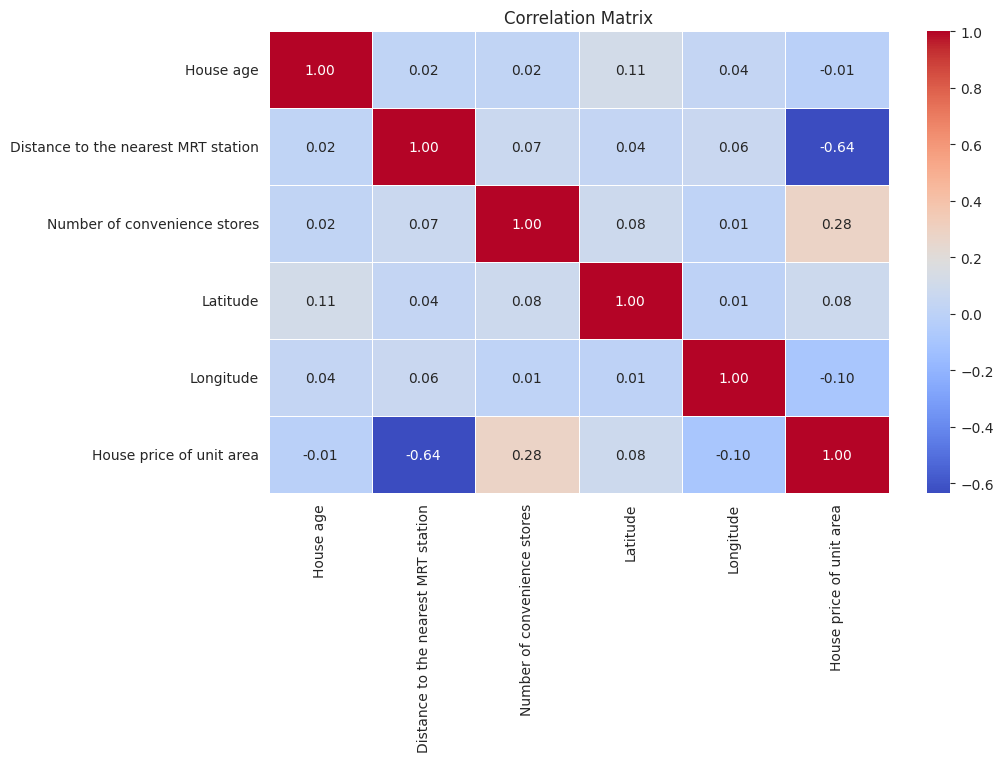

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [97]:
# Drop the 'Transaction date' column before calculating correlation
correlation_matrix = data.drop('Transaction date', axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

##Now, let's develop a regression model to predict real estate prices using the Linear Regression algorithm

In [98]:
# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = data[features]
y = data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [101]:
# Making predictions using the linear regression model
y_pred = model.predict(X_test)

##Let’s create a visualization of the actual versus predicted values to analyze the effectiveness of our model

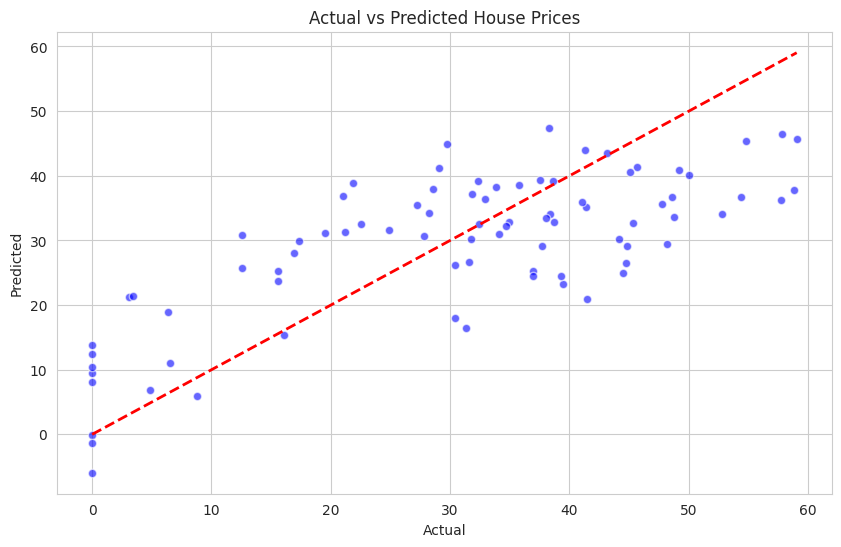

In [106]:
# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

**The diagonal dashed line illustrates where the actual and predicted values are equal. Points situated near this line indicate that the predictions are accurate.**

##**The Real Estate Price Prediction project aimed to estimate future property prices using the Linear Regression algorithm. By analyzing various factors such as house age, distance to the nearest MRT station, number of convenience stores, latitude, and longitude, we developed a model to forecast real estate prices. This process is crucial for providing accurate property valuations to buyers, sellers, investors, and real estate professionals, enabling them to make informed decisions in the market.**

##**Throughout the project, we explored the relationships between the input features and house prices through visualizations and correlation analysis. This helped identify key factors influencing property values, thereby enhancing our understanding of the housing market dynamics**.

##**The implementation of the Linear Regression model demonstrated promising results, as evidenced by the performance metrics and visualizations comparing actual versus predicted values. The model's ability to capture the underlying trends and patterns in the data supports its practical application in real-world scenarios.**